In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Data prep

In [3]:
y = df['Outcome']
X = df.drop('Outcome',axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Hyperparameter optimisation

In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1,8+1),'min_samples_leaf':[5,10,15]}

opt_model = GridSearchCV(model,param_grid,cv=3,scoring='roc_auc')
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

opt_model.best_params_

{'max_depth': 4, 'min_samples_leaf': 10}

In [27]:
probas

array([[0.55913978, 0.44086022],
       [0.86206897, 0.13793103],
       [0.99159664, 0.00840336],
       [0.97560976, 0.02439024],
       [0.55913978, 0.44086022],
       [0.55913978, 0.44086022],
       [0.99159664, 0.00840336],
       [0.26829268, 0.73170732],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.55913978, 0.44086022],
       [0.2173913 , 0.7826087 ],
       [0.81818182, 0.18181818],
       [0.26829268, 0.73170732],
       [0.99159664, 0.00840336],
       [0.86206897, 0.13793103],
       [0.86206897, 0.13793103],
       [0.99159664, 0.00840336],
       [1.        , 0.        ],
       [0.55      , 0.45      ],
       [0.55913978, 0.44086022],
       [0.92857143, 0.07142857],
       [0.55913978, 0.44086022],
       [0.86206897, 0.13793103],
       [0.55913978, 0.44086022],
       [0.04      , 0.96      ],
       [0.99159664, 0.00840336],
       [0.99159664, 0.00840336],
       [0.86206897, 0.13793103],
       [0.92857143, 0.07142857],
       [0.

0.778308000471309

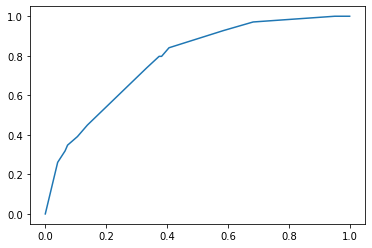

In [28]:
from sklearn.metrics import roc_curve,auc

probas = best_model.predict_proba(X_test)
fpr,tpr,thr = roc_curve(y_test,probas[:,1])
plt.plot(fpr,tpr)
auc(fpr,tpr)

### Sanity check

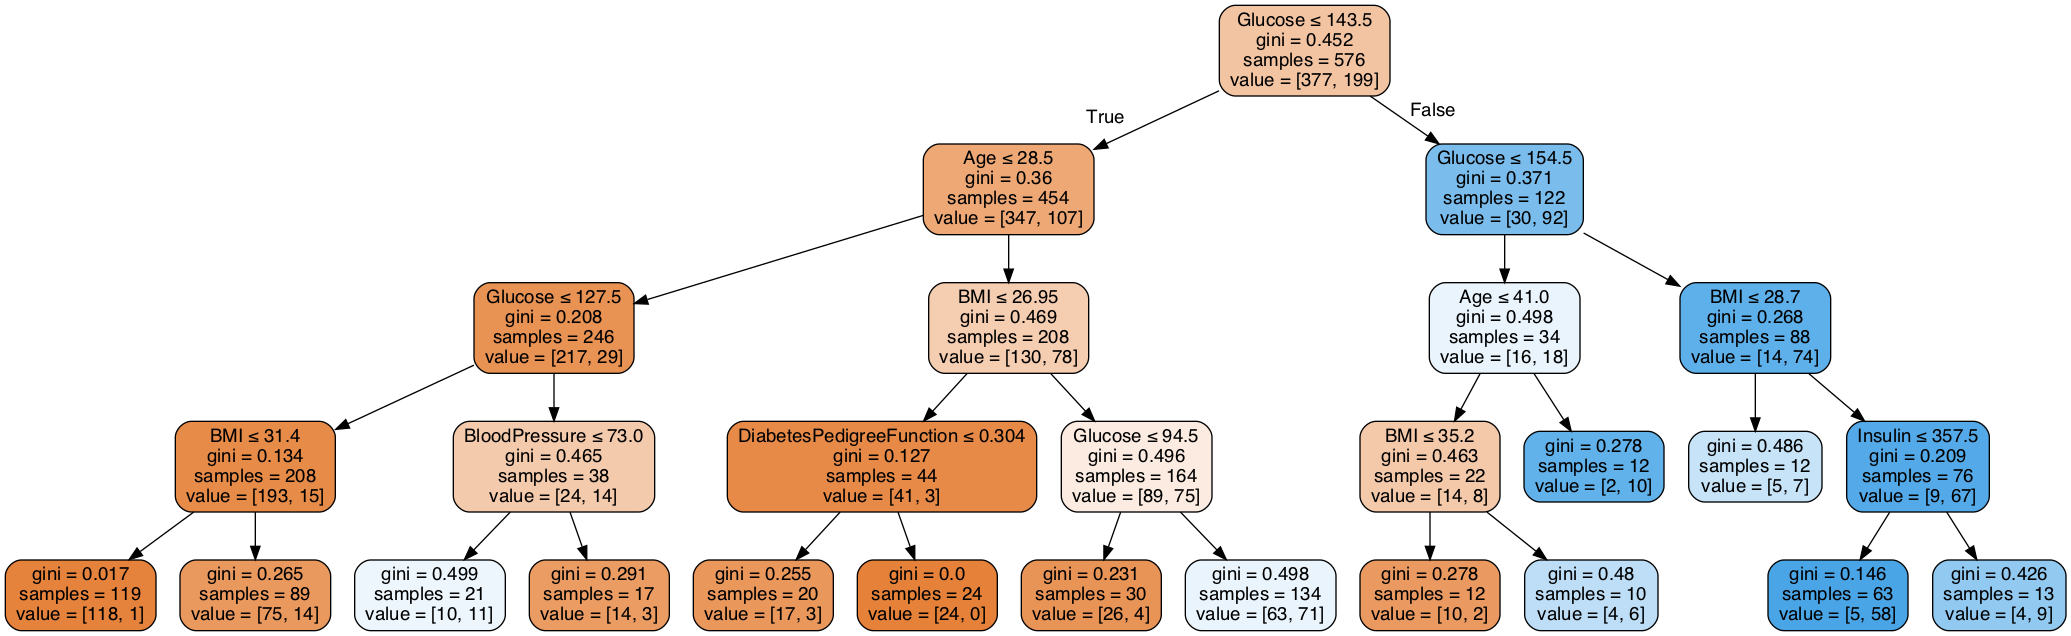

In [29]:
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(best_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [30]:
pd.DataFrame(opt_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003491,0.000481,0.002841,0.000960,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.678157,0.676768,0.663697,0.672899,0.006506,22
1,0.002985,0.000654,0.002213,0.000266,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.678157,0.676768,0.663697,0.672899,0.006506,22
2,0.002095,0.000080,0.001826,0.000081,1,15,"{'max_depth': 1, 'min_samples_leaf': 15}",0.678157,0.676768,0.663697,0.672899,0.006506,22
3,0.002055,0.000179,0.001535,0.000119,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.753613,0.769000,0.744970,0.755876,0.009928,19
4,0.001912,0.000106,0.001856,0.000286,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.753613,0.769000,0.744970,0.755876,0.009928,19
5,0.001857,0.000241,0.001307,0.000046,2,15,"{'max_depth': 2, 'min_samples_leaf': 15}",0.753613,0.769000,0.744970,0.755876,0.009928,19
6,0.001768,0.000055,0.001336,0.000031,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.796257,0.771705,0.794970,0.787646,0.011284,14
7,0.001726,0.000035,0.001404,0.000104,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.801706,0.808622,0.792061,0.800813,0.006782,5
8,0.001765,0.000044,0.001299,0.000037,3,15,"{'max_depth': 3, 'min_samples_leaf': 15}",0.801528,0.808502,0.786424,0.798844,0.009201,9
9,0.001819,0.000067,0.001313,0.000052,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",0.780384,0.838444,0.789515,0.802765,0.025503,4


### Importances

In [24]:
list(best_model.feature_importances_)

[0.0,
 0.5502534280544041,
 0.031611828293049656,
 0.0,
 0.013400070495506775,
 0.1938101061100555,
 0.0735618519302128,
 0.13736271511677114]

In [25]:
list(X.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### Single model

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf=10)

In [32]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
probas = model.predict_proba(X_test)

In [34]:
from sklearn.metrics import roc_curve,auc
fpr,tpr, thrsh = roc_curve(y_test,probas[:,1])
auc(fpr,tpr)

0.7533875338753387